### 1. 성적 데이터 생성

In [1]:
import numpy as np
import pandas as pd

In [28]:
# DataFrame
data = pd.DataFrame([[2, 20],
                     [4, 40],
                     [8, 80],
                     [9, 90]],
                     columns = ['시간', '성적'],
                     index = ['수아', '형주', '혜지', '자람'])
data

,시간,성적
수아,2,20
형주,4,40
혜지,8,80
자람,9,90


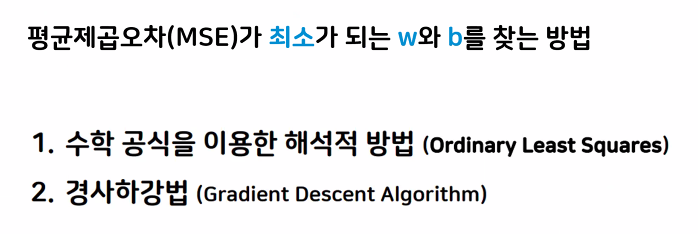

### 1. 수학 공식을 이용한 해석적 모델

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# 선형 모델 생성
linear_model = LinearRegression()

In [31]:
# 문제 데이터
data['시간']

수아    2
형주    4
혜지    8
자람    9
Name: 시간, dtype: int64

In [32]:
# 정답 데이터
data['성적']

수아    20
형주    40
혜지    80
자람    90
Name: 성적, dtype: int64

In [33]:
linear_model.fit(data[['시간']],data['성적'] ) # 학습시킬 데이터 X, 정답 데이터 Y

LinearRegression()

In [34]:
# 가중치
linear_model.coef_

array([10.])

In [35]:
# 편향
linear_model.intercept_

7.105427357601002e-15

In [36]:
# 예측
linear_model.predict([[7]])

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

### H(x) = w*x + b

In [37]:
def h(w, x, b):
    return w*x+b

### 비용함수
- 평균제곱오차(MSE)
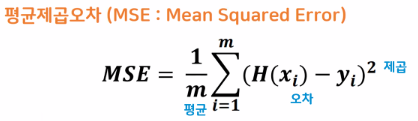

In [41]:
def cost(data, target, weight, intercept): # MSE 구하는 함수
    y_pre = h(weight, data, intercept)  # 예측값
    return ( (y_pre - target) **2 ).mean()  # 평균제곱오차(MSE)

In [42]:
# MSE가 0! 오차가 없다!
cost( data['시간'], data['성적'], 10, 0 )

0.0

In [43]:
# 가중치 10->20, MSE는 0->4125
cost( data['시간'], data['성적'], 20, 0 )

4125.0

In [44]:
# 가중치 10->8, MSE는 0->165
cost( data['시간'], data['성적'], 8, 0 )

165.0

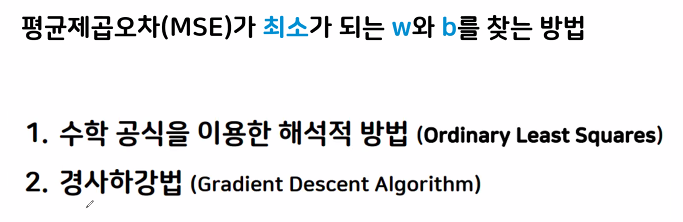

### SGDRegressor 사용하기 
- 경사하강법

In [46]:
from sklearn.linear_model import SGDRegressor

In [50]:
sgd_model = SGDRegressor(max_iter=1000,  # 가중치 수정하는 횟수
            eta0 = 0.01,  # 학습률(Learning rate)
            verbose = 1)  # 학습 과정 확인 가능

In [51]:
sgd_model.fit( data[['시간']], data['성적'] )
# Epoch 1 : 첫번째 학습 ,,, n번째 학습
# loss : 손실값

-- Epoch 1
Norm: 8.31, NNZs: 1, Bias: 1.248572, T: 4, Avg. loss: 901.472654
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.43, NNZs: 1, Bias: 1.395341, T: 8, Avg. loss: 26.385151
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.70, NNZs: 1, Bias: 1.427995, T: 12, Avg. loss: 1.929679
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.77, NNZs: 1, Bias: 1.432981, T: 16, Avg. loss: 0.381347
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.80, NNZs: 1, Bias: 1.430569, T: 20, Avg. loss: 0.238703
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.81, NNZs: 1, Bias: 1.426999, T: 24, Avg. loss: 0.216426
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.81, NNZs: 1, Bias: 1.422274, T: 28, Avg. loss: 0.215782
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.81, NNZs: 1, Bias: 1.417266, T: 32, Avg. loss: 0.213782
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.81, NNZs: 1, Bias: 1.412973, T: 36, Avg. loss: 0.210010
Total training time: 0.00 seconds.
-- Epoch 

SGDRegressor(verbose=1)

In [52]:
sgd_model.predict([[7]])

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([70.05795152])

In [53]:
sgd_model.coef_  # 계수

array([9.83855309])

In [54]:
sgd_model.intercept_

array([1.18807991])